In [1]:
from __future__ import print_function

import os
import numpy as np
import pandas as pd
import seaborn as sns

from tqdm import *
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
dataset_path = 'mfccs/13/'
cls_list = ['blues',
            'classical',
            'country',
            'disco',
            'hiphop',
            'jazz',
            'metal',
            'pop',
            'reggae',
            'rock']

### Data loading and preparation

In [3]:
X = []
y = []

for cls in tqdm(os.listdir(dataset_path)):
    cls_path = os.path.join(dataset_path, cls)
    
    for f in os.listdir(cls_path):
        X.append(pd.read_csv(os.path.join(cls_path, f), delimiter=';', header=None).iloc[:, :-1])
        y.append(cls_list.index(cls))

100%|██████████| 10/10 [00:06<00:00,  1.58it/s]


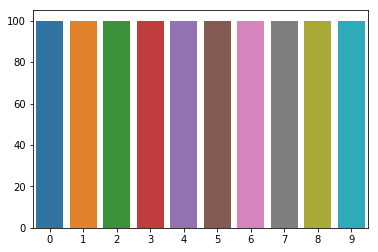

In [4]:
y_np = np.asarray(y)
v, c = np.unique(y_np, return_counts=True)
sns.barplot(v, c)

#### MFCC simplification
Each audio has 13 MFCCs per frame. We are simplifying it by computing the mean of the frames and using the resulting single vector of 13 MFCCs as the audio representation.

In [5]:
X_std = []

for idx, i in tqdm(enumerate(X)):
    X_std.append(np.mean(i, axis=0))

1000it [00:00, 2533.86it/s]


In [6]:
X_std = np.asarray(X_std)
print(X_std.shape, X_std.dtype)

(1000, 13) float64


### Train/Val split

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_std, y_np, test_size=0.33, random_state=33, stratify=y_np)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(670, 13) (330, 13) (670,) (330,)


In [8]:
model = svm.SVC()
model.fit(X_train, y_train)

/home/thomas/.envs/py3/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [9]:
y_train_pred = model.predict(X_train)
print('Train')
print(classification_report(y_train, y_train_pred))

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        67
           2       1.00      1.00      1.00        67
           3       1.00      1.00      1.00        67
           4       1.00      1.00      1.00        67
           5       1.00      1.00      1.00        67
           6       1.00      1.00      1.00        67
           7       1.00      1.00      1.00        67
           8       1.00      1.00      1.00        67
           9       1.00      1.00      1.00        67

   micro avg       1.00      1.00      1.00       670
   macro avg       1.00      1.00      1.00       670
weighted avg       1.00      1.00      1.00       670



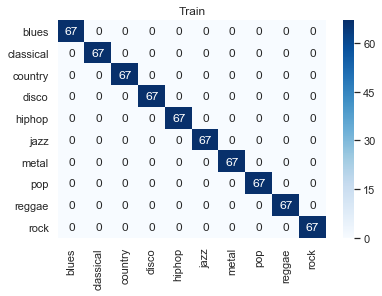

In [10]:
cm = confusion_matrix(y_train, y_train_pred)
sns.set()
plt.figure()
plt.title('Train')
sns.heatmap(cm, annot=True, yticklabels=cls_list, xticklabels=cls_list, cmap='Blues')

In [11]:
y_pred = model.predict(X_val)
print('Val')
print(classification_report(y_val, y_pred))

Val
              precision    recall  f1-score   support

           0       0.11      1.00      0.19        33
           1       0.00      0.00      0.00        33
           2       0.67      0.06      0.11        33
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00        33
           5       1.00      0.09      0.17        33
           6       0.75      0.09      0.16        33
           7       0.00      0.00      0.00        33
           8       1.00      0.03      0.06        33
           9       0.60      0.09      0.16        33

   micro avg       0.14      0.14      0.14       330
   macro avg       0.41      0.14      0.08       330
weighted avg       0.41      0.14      0.08       330



/home/thomas/.envs/py3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


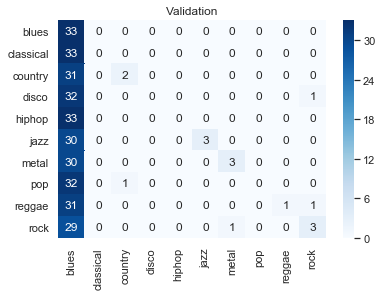

In [12]:
cm = confusion_matrix(y_val, y_pred)
sns.set()
plt.figure()
plt.title('Validation')
sns.heatmap(cm, annot=True, yticklabels=cls_list, xticklabels=cls_list, cmap='Blues')

### With normalization

In [13]:
X_train_means = X_train.mean(axis=0)
X_train_stds = X_train.std(axis=0)

print('Means:', X_train_means)
print('Stds:', X_train_stds)

Means: [-650.6297977   133.04630026   -6.57415915   34.46168699   -3.30174185
   12.07065647   -7.9906482    10.0232402    -8.30882395    7.52375389
   -6.85239181    4.18318983   -5.18664802]
Stds: [101.02985116  36.1597846   24.5315318   20.24361409  12.1117232
  13.29301     10.08719245  10.236978     7.8850999    7.24217957
   6.96274209   5.67676019   5.68651412]


In [14]:
X_train -= X_train_means
X_train /= X_train_stds

print('Means:', X_train.mean(axis=0))
print('Std:', X_train.std(axis=0))

Means: [-3.91063633e-15  3.09304821e-15 -1.77469979e-16  1.09680093e-15
 -1.65870634e-16 -7.98987742e-16  7.04908768e-16  9.56780260e-16
 -2.13179391e-16  1.39988560e-15  1.17683641e-15  8.07811529e-17
 -2.43669098e-16]
Std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [15]:
X_val -= X_train_means
X_val /= X_train_stds

In [16]:
model = svm.SVC()
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [17]:
y_train_pred = model.predict(X_train)
print('Train')
print(classification_report(y_train, y_train_pred))

Train
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        67
           1       0.96      0.99      0.97        67
           2       0.76      0.66      0.70        67
           3       0.61      0.76      0.68        67
           4       0.68      0.61      0.65        67
           5       0.84      0.76      0.80        67
           6       0.75      0.88      0.81        67
           7       0.81      0.93      0.86        67
           8       0.75      0.73      0.74        67
           9       0.67      0.58      0.62        67

   micro avg       0.77      0.77      0.77       670
   macro avg       0.77      0.77      0.77       670
weighted avg       0.77      0.77      0.77       670



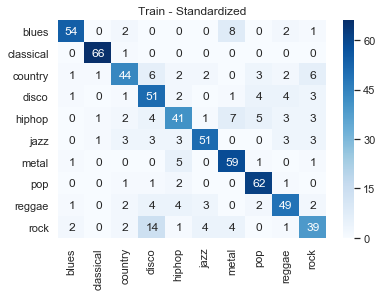

In [18]:
cm = confusion_matrix(y_train, y_train_pred)
sns.set()
plt.figure()
plt.title('Train - Standardized')
sns.heatmap(cm, annot=True, yticklabels=cls_list, xticklabels=cls_list, cmap='Blues')

In [19]:
y_pred = model.predict(X_val)
print('Val')
print(classification_report(y_val, y_pred))

Val
              precision    recall  f1-score   support

           0       0.74      0.52      0.61        33
           1       0.79      0.91      0.85        33
           2       0.55      0.52      0.53        33
           3       0.45      0.42      0.44        33
           4       0.52      0.48      0.50        33
           5       0.56      0.58      0.57        33
           6       0.72      0.79      0.75        33
           7       0.65      0.67      0.66        33
           8       0.51      0.58      0.54        33
           9       0.40      0.42      0.41        33

   micro avg       0.59      0.59      0.59       330
   macro avg       0.59      0.59      0.59       330
weighted avg       0.59      0.59      0.59       330



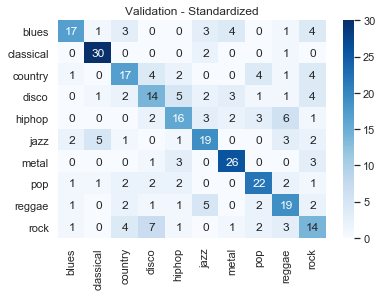

In [20]:
cm = confusion_matrix(y_val, y_pred)
sns.set()
plt.figure()
plt.title('Validation - Standardized')
sns.heatmap(cm, annot=True, yticklabels=cls_list, xticklabels=cls_list, cmap='Blues')